In [1]:
# Basic Packages Required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Classifying Penguins By Species
### Pre-Process Data

In [2]:
import palmerpenguins

In [3]:
penguins_df = palmerpenguins.load_penguins()

# Shuffling the Data
penguins_df = penguins_df.sample(frac=1, random_state=1236) 
penguins_df = penguins_df.dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
259,Gentoo,Biscoe,53.4,15.8,219.0,5500.0,male,2009
265,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,male,2009
50,Adelie,Biscoe,39.6,17.7,186.0,3500.0,female,2008
290,Chinstrap,Dream,45.9,17.1,190.0,3575.0,female,2007
187,Gentoo,Biscoe,48.4,16.3,220.0,5400.0,male,2008


In [4]:
# Convert categorical variable into dummy/indicator variables, drop the Y species value.
X_df = pd.get_dummies(penguins_df.drop(columns = ['species']), drop_first = True)
X_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
259,53.4,15.8,219.0,5500.0,2009,0,0,1
265,51.5,16.3,230.0,5500.0,2009,0,0,1
50,39.6,17.7,186.0,3500.0,2008,0,0,0
290,45.9,17.1,190.0,3575.0,2007,1,0,0
187,48.4,16.3,220.0,5400.0,2008,0,0,1


In [5]:
# Species we want to classify:
y_df = penguins_df.species
y_df

259       Gentoo
265       Gentoo
50        Adelie
290    Chinstrap
187       Gentoo
         ...    
56        Adelie
28        Adelie
337    Chinstrap
331    Chinstrap
35        Adelie
Name: species, Length: 333, dtype: object

In [17]:
# Sklearn uses arrays often as inputs for simplicity as opposed to a dataframe, lets convert for easier classification.
X = np.array(X_df)
print(X) # Contains same content in an array.

[[ 53.4  15.8 219.  ...   0.    0.    1. ]
 [ 51.5  16.3 230.  ...   0.    0.    1. ]
 [ 39.6  17.7 186.  ...   0.    0.    0. ]
 ...
 [ 46.8  16.5 189.  ...   1.    0.    0. ]
 [ 52.2  18.8 197.  ...   1.    0.    1. ]
 [ 39.2  21.1 196.  ...   1.    0.    1. ]]


In [18]:
# Similar for Y labels:
y = y_df.replace(['Adelie','Gentoo','Chinstrap'], [0,1,2])
y = np.array(y)
y

array([1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1,
       2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 2,
       1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2,
       2, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 2,
       0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 2,
       0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0,

# Generate and Fit Tree to Data

In [20]:
from sklearn import tree 
# max_depth controls the overall complexity of a decision tree. 
# Trade-off between an under-fitted and over-fitted decision tree. 
clf_tree = tree.DecisionTreeClassifier(max_depth = 3)
clf_tree = clf_tree.fit(X, y) # Fit the data

# First five predictions?
print("Predicted : ",clf_tree.predict(X[0:5]))
print("Actual : ",y[0:5])

Predicted :  [1 1 0 2 1]
Actual :  [1 1 0 2 1]


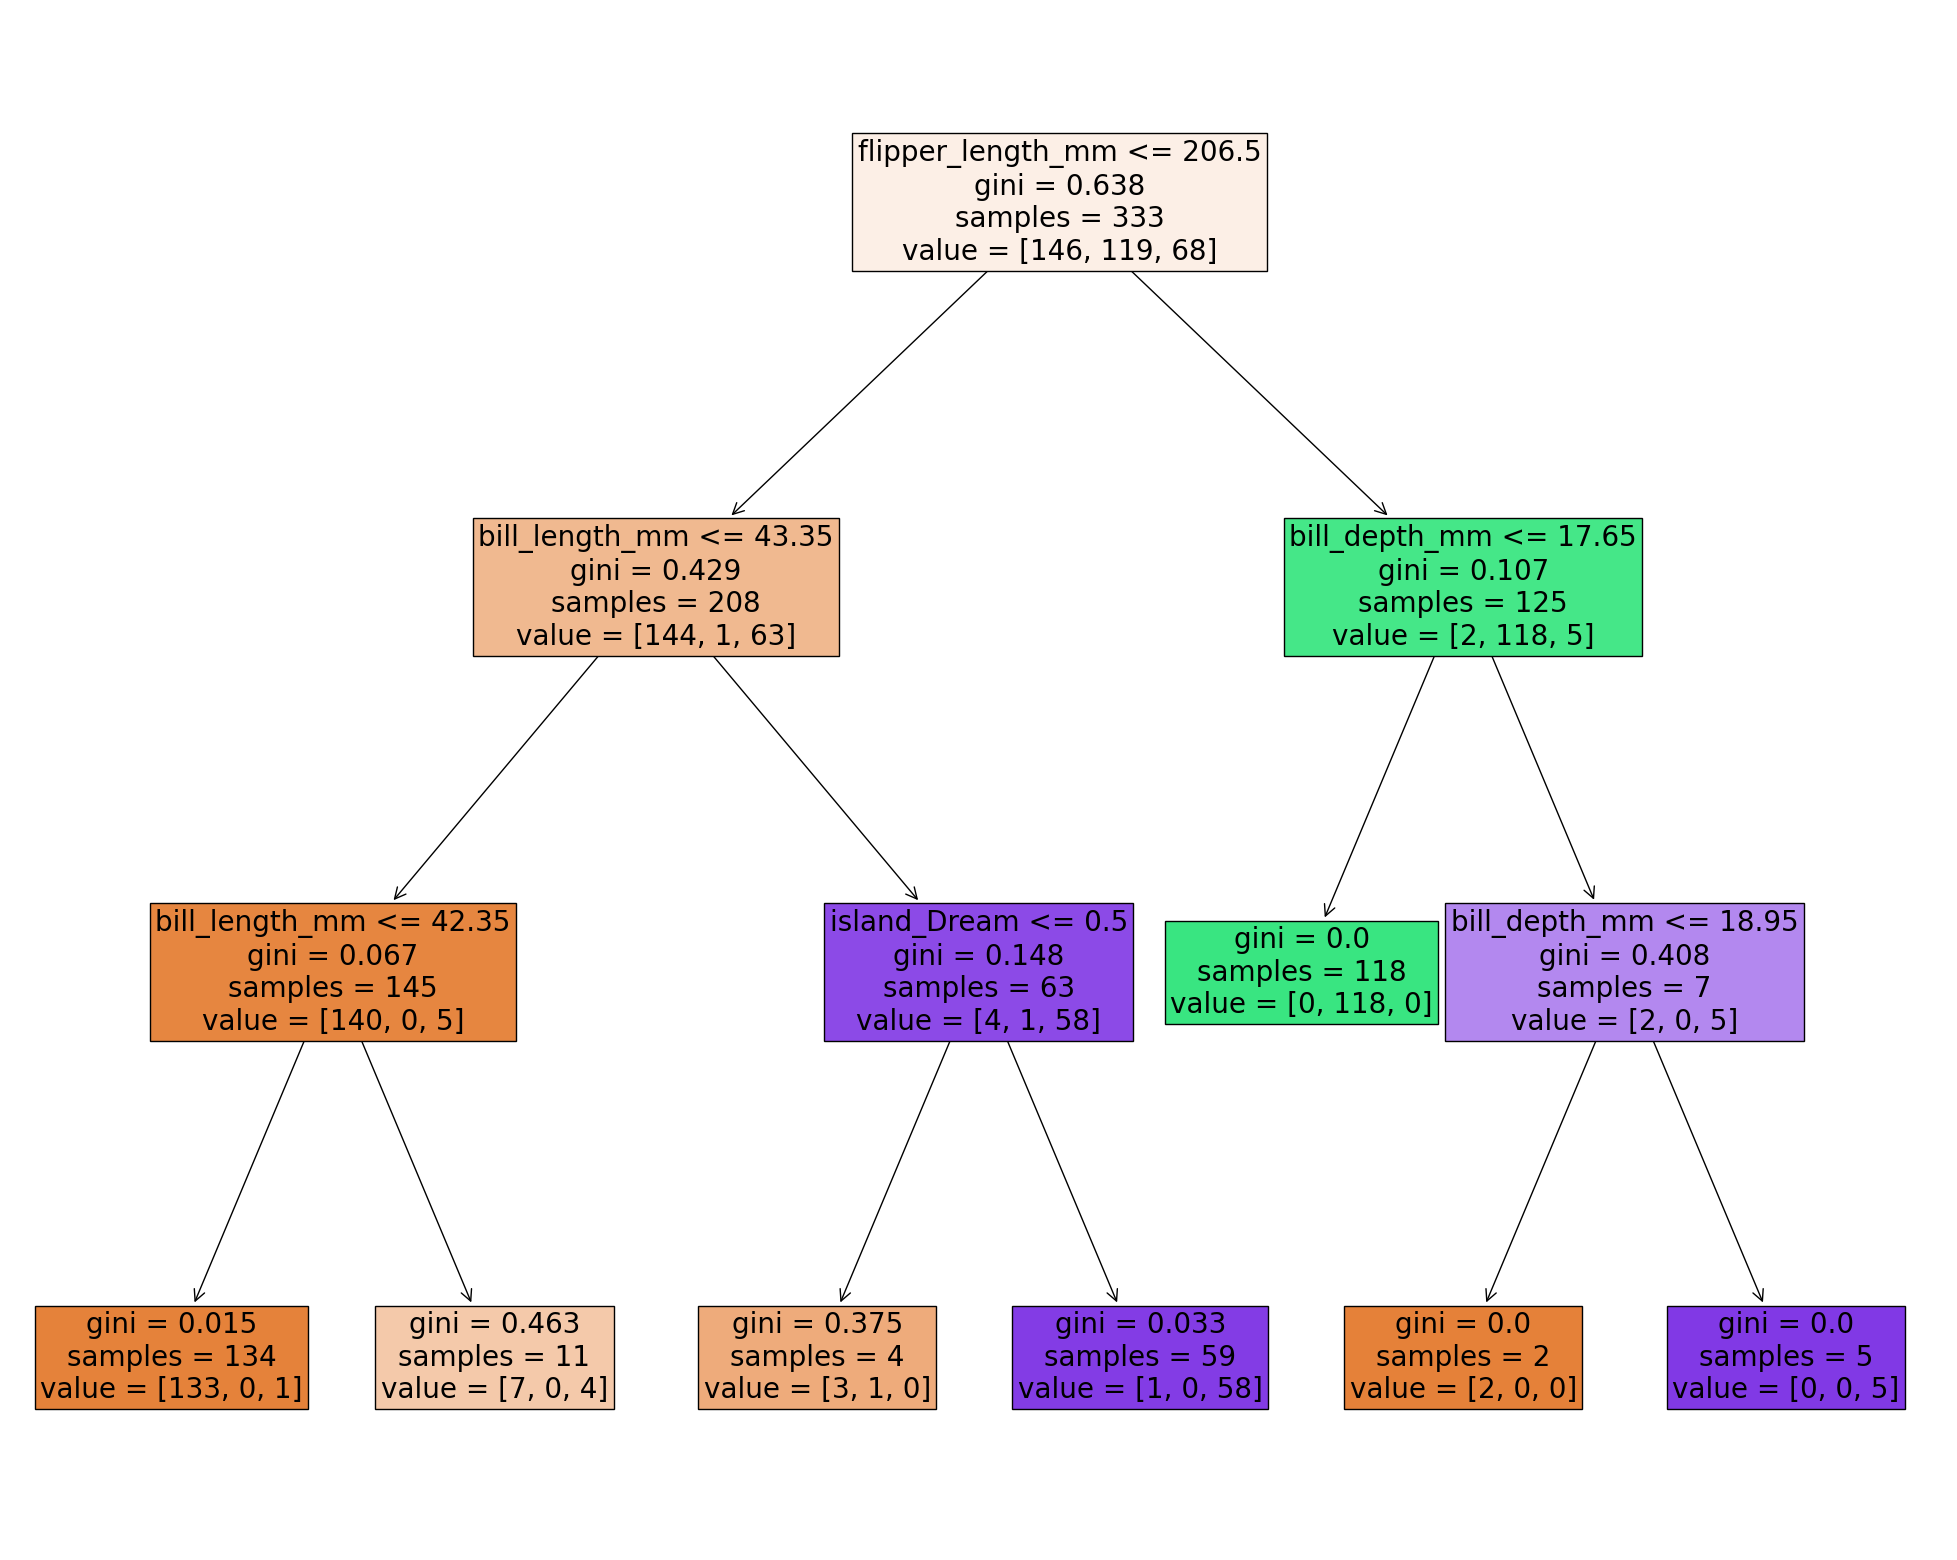

In [21]:
fig = plt.figure(figsize = (25,20))
_= tree.plot_tree(clf_tree, feature_names = X_df.columns, 
               filled = True, 
              fontsize = 20)

# Pruning Tree, Max_Depth Change

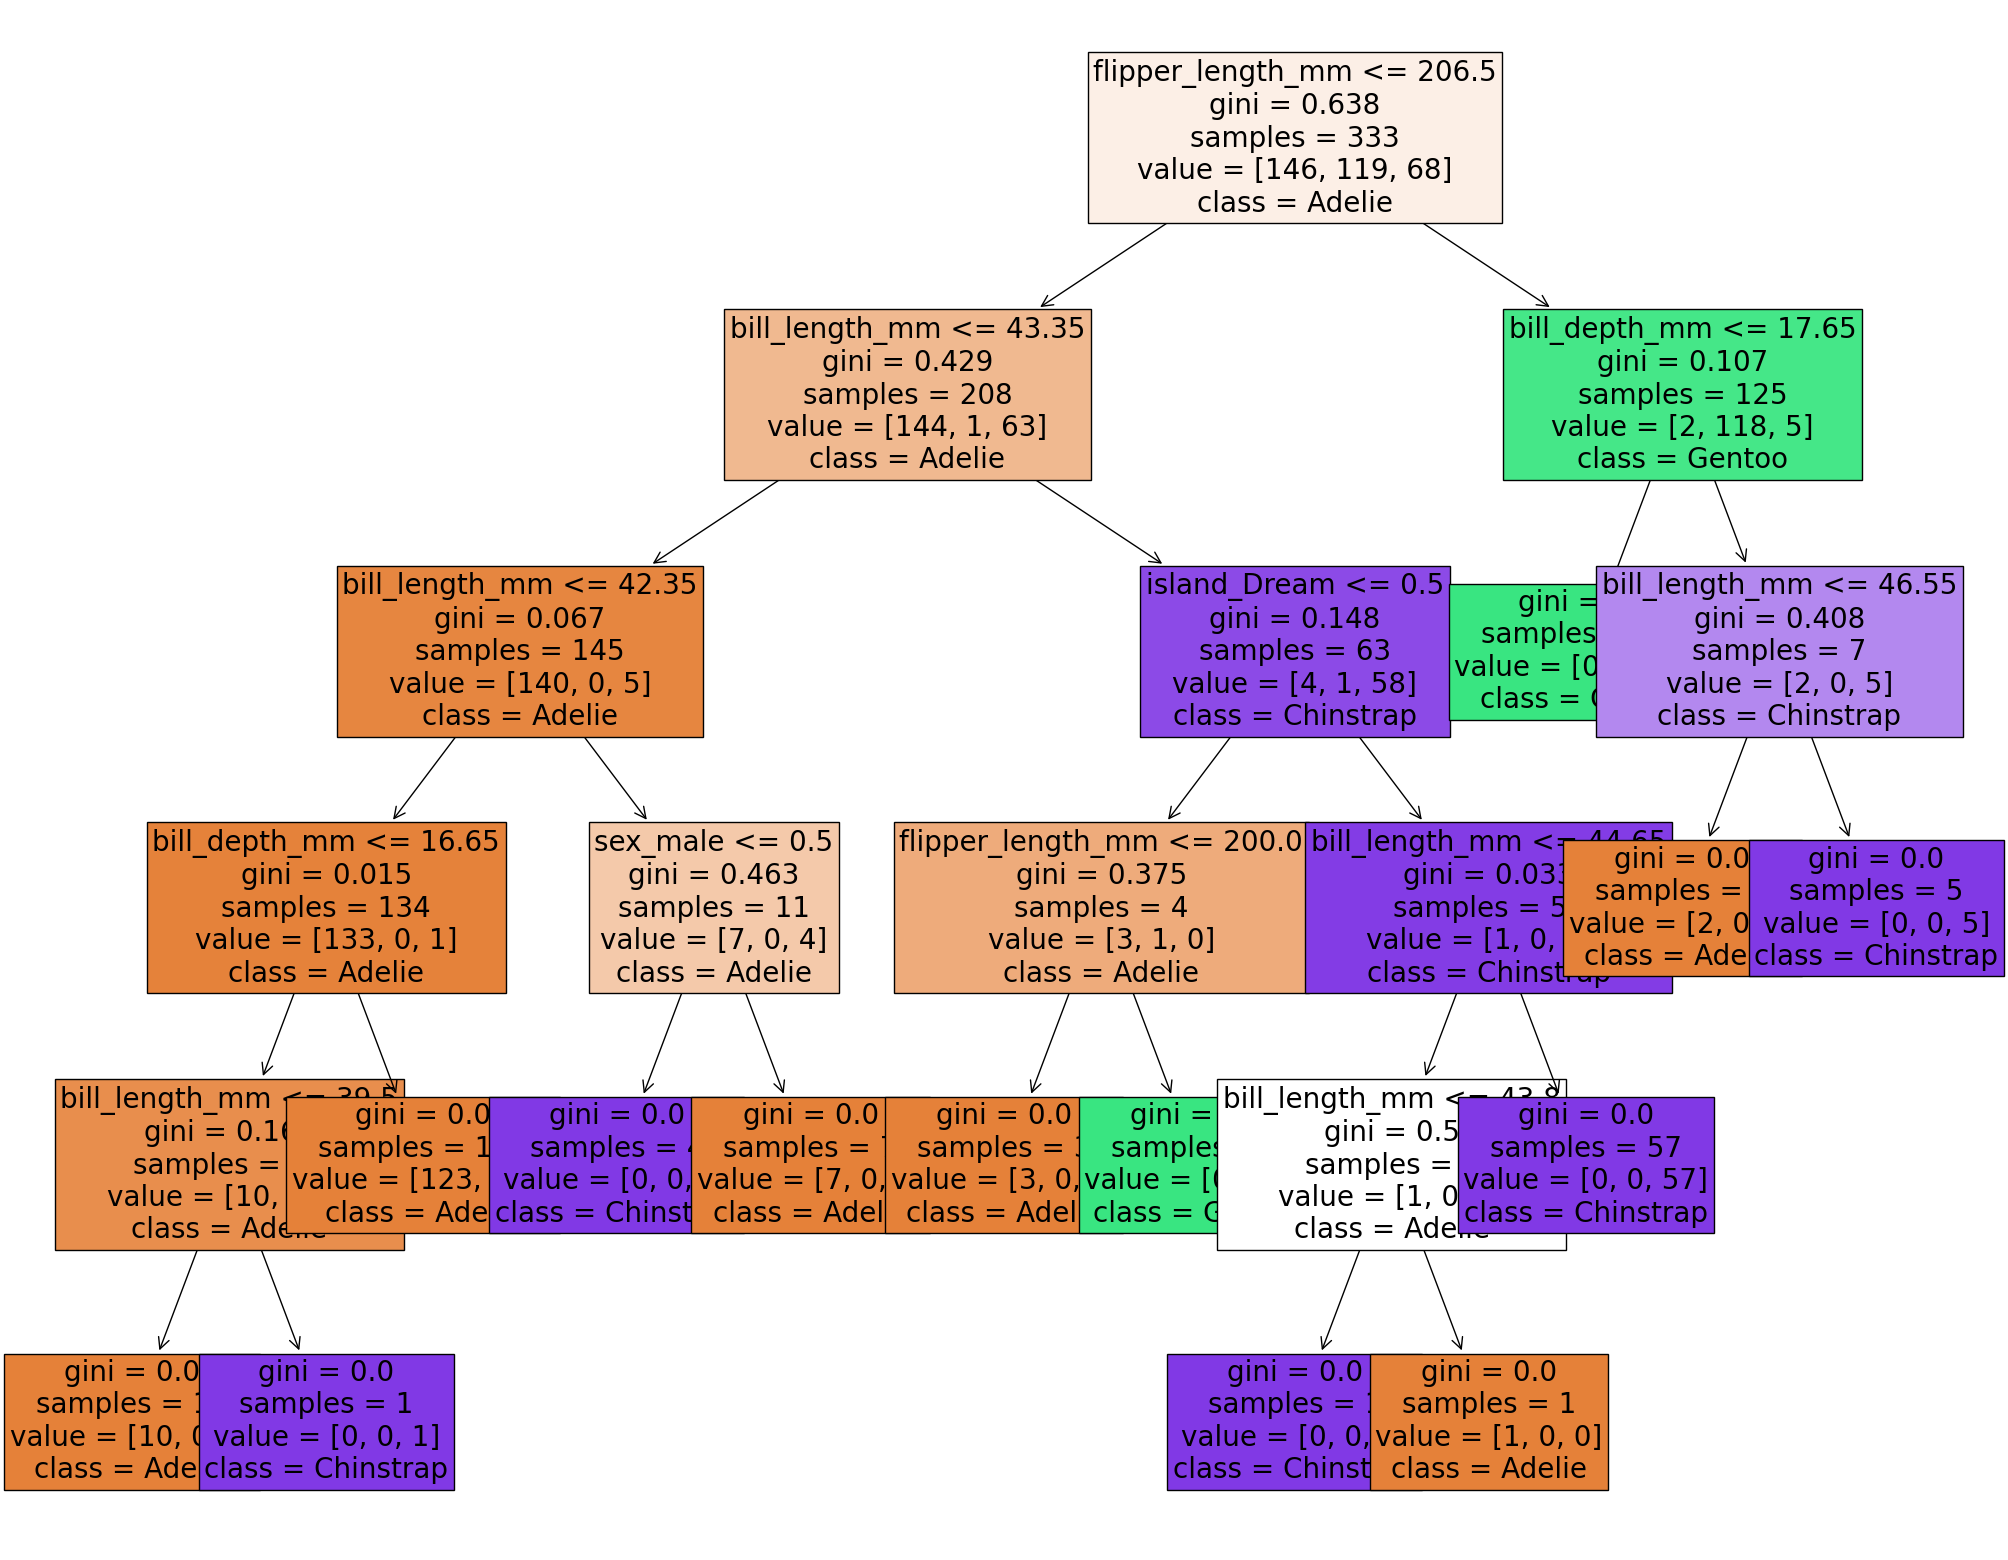

In [23]:
clf_tree = tree.DecisionTreeClassifier(max_depth = 5)
clf_tree = clf_tree.fit(X, y)
fig = plt.figure(figsize = (25,20))
_= tree.plot_tree(clf_tree, feature_names = X_df.columns, 
                  class_names =  ['Adelie','Gentoo','Chinstrap'],filled = True, fontsize = 20)